We experiment with different neural net configurations (different architectures, loss functions, etc.), and evaluate predicted coverage versus true coverage.

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from ems_data import EMSData
from neural_network import MLP

In [2]:
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

NVIDIA GeForce GTX 1070


device(type='cuda')

In [3]:
# Get X_train, X_dev, X_test, y_train, y_dev, y_test
ems_data = EMSData.load_instance('ems_data.pkl')
n_stations = len(ems_data.stations)
n_demand_nodes = len(ems_data.demand_nodes)
demand = ems_data.demand_nodes.demand
dataset = pd.read_csv('dataset_toronto_ar1000_amb75.csv')
X = dataset[[f'station{i}' for i in range(n_stations)]].to_numpy()
y = dataset[[f'coverage{i}' for i in range(n_demand_nodes)]].to_numpy()
X = torch.tensor(X, dtype=torch.float32, device=device)
y = torch.tensor(y, dtype=torch.float32, device=device)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, random_state=0, train_size=2/3)
X_train.shape, X_dev.shape, X_test.shape, y_train.shape, y_dev.shape, y_test.shape

(torch.Size([50000, 46]),
 torch.Size([25000, 46]),
 torch.Size([25000, 46]),
 torch.Size([50000, 67]),
 torch.Size([25000, 67]),
 torch.Size([25000, 67]))

In [4]:
print(f"total demand: {demand.sum()}")
true_coverage = y_test.cpu().numpy()@demand

def print_statistics_and_plot_histogram(values, name):
    print(f"{name} statistics:")
    print(f"    mean: {values.mean()}")
    print(f"    std: {values.std()}")
    print(f"    median: {np.median(values)}")
    print(f"    min: {values.min()}")
    print(f"    max: {values.max()}")
    plt.hist(values, bins=100)
    plt.show()

def print_output(mlp):
    # MIP uses modified sigmoid, so we evaluate the same way
    y_pred = mlp.predict(X_test, modified_sigmoid=True).cpu().numpy()
    predicted_coverage = y_pred@demand
    coverage_diff = predicted_coverage - true_coverage
    print_statistics_and_plot_histogram(true_coverage, "true coverage")
    print_statistics_and_plot_histogram(predicted_coverage, "predicted coverage")
    print_statistics_and_plot_histogram(coverage_diff, "coverage difference (predicted - true)")
    print_statistics_and_plot_histogram(coverage_diff[coverage_diff > 50], "coverage difference above 50")

total demand: 297700


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 844.82it/s]


Initial train loss: 0.7173777287292481, initial dev loss: 0.7172079057884216


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 793.52it/s]


Train loss: 0.4399788139152527, dev loss: 0.43002761419296265


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 793.52it/s]


Train loss: 0.4308168274497986, dev loss: 0.429330129365921


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 809.91it/s]


Train loss: 0.43009109790802, dev loss: 0.4290567584133148


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 789.51it/s]


Train loss: 0.42982431324958803, dev loss: 0.4289484474277496


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 750.96it/s]


Train loss: 0.4296825132369995, dev loss: 0.42888186411857604


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 793.53it/s]


Train loss: 0.4296033889579773, dev loss: 0.42888592410087584


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 685.99it/s]


Train loss: 0.4295519824123383, dev loss: 0.42884107113838194


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 682.93it/s]


Train loss: 0.4294987009716034, dev loss: 0.42883439003944396


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 666.67it/s]


Train loss: 0.4294661944103241, dev loss: 0.42881851910591123


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 622.22it/s]


Train loss: 0.42943418672561645, dev loss: 0.42884323859214785


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 626.20it/s]


Train loss: 0.4293883003807068, dev loss: 0.4288267104721069


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 624.20it/s]


Train loss: 0.42935581110954285, dev loss: 0.428806633272171


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 640.53it/s]


Train loss: 0.42933417657852174, dev loss: 0.42878208472251894


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 640.52it/s]


Train loss: 0.4292881093120575, dev loss: 0.42871734572410586


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 626.20it/s]


Train loss: 0.4292639971065521, dev loss: 0.4287289370727539


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 616.35it/s]


Train loss: 0.42923351949691774, dev loss: 0.4287232728290558


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 610.59it/s]


Train loss: 0.4292030033683777, dev loss: 0.42871897042274476


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 626.20it/s]


Train loss: 0.4291780692386627, dev loss: 0.42872635401725767


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 649.01it/s]


Train loss: 0.42915022413253784, dev loss: 0.42869366314888


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 622.22it/s]


Train loss: 0.4291294642829895, dev loss: 0.42871366256713866


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 649.01it/s]


Train loss: 0.42909374550819396, dev loss: 0.4287241845703125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 632.26it/s]


Train loss: 0.42906579802513123, dev loss: 0.42871252844810487


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 626.20it/s]


Train loss: 0.42904501401901246, dev loss: 0.4287783773899078


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 618.20it/s]


Train loss: 0.42902099229812624, dev loss: 0.428701489944458
Early stopping


Predicting: 100%|██████████| 196/196 [00:00<00:00, 1451.87it/s]


true coverage statistics:
    mean: 258342.89194564644
    std: 3855.1797776168737
    median: 258977.41951671243
    min: 224379.13118171692
    max: 267008.6257327199


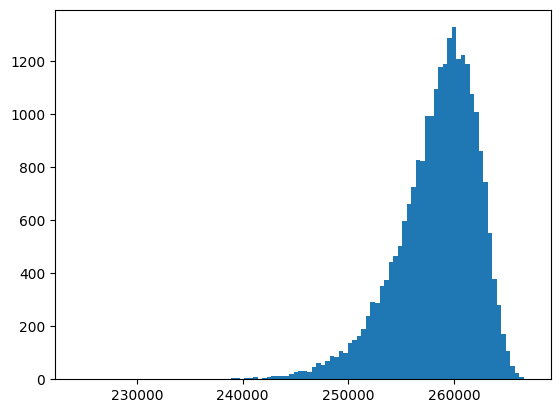

predicted coverage statistics:
    mean: 258137.2166604324
    std: 3293.9329080277257
    median: 258767.65397244692
    min: 235290.54534089565
    max: 264978.3593881726


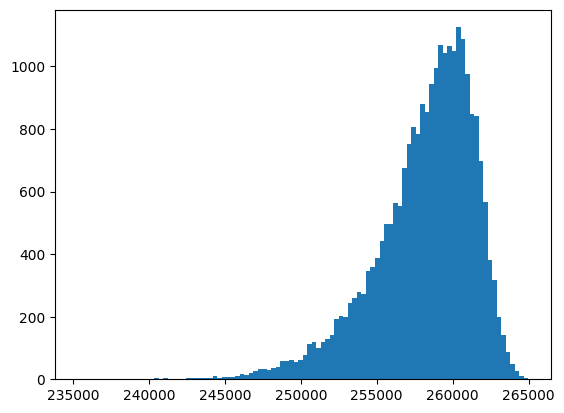

coverage difference (predicted - true) statistics:
    mean: -205.67528521402716
    std: 1382.4504228565572
    median: -351.47336107492447
    min: -4800.558389186859
    max: 17732.04348731041


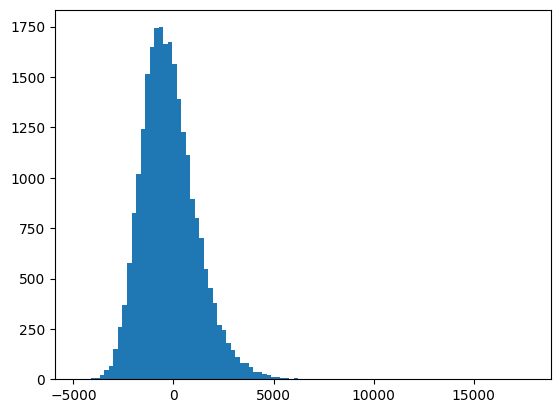

coverage difference above 50 statistics:
    mean: 1181.2436054986872
    std: 1008.6550369772748
    median: 918.2994616627693
    min: 50.00246572494507
    max: 17732.04348731041


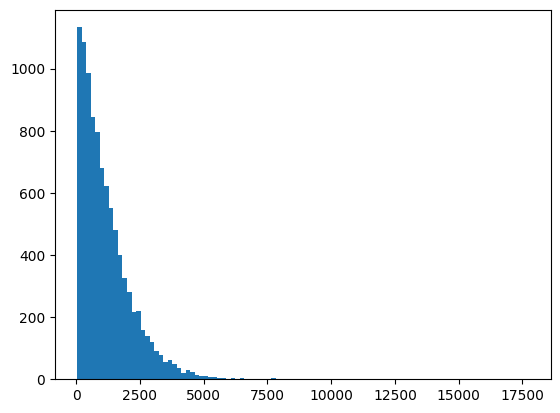

In [5]:
# Train MLP using binary cross entropy
loss_fn = F.binary_cross_entropy_with_logits

mlp = MLP(n_stations, [200], n_demand_nodes, dropout=0.1).to(device)
init_train_loss = mlp.evaluate_loss(X_train, y_train, loss_fn)
init_dev_loss = mlp.evaluate_loss(X_dev, y_dev, loss_fn)
print(f"Initial train loss: {init_train_loss}, initial dev loss: {init_dev_loss}")
mlp.fit(X_train, y_train, X_dev, y_dev, loss_fn, verbose=True)
print_output(mlp)

Evaluating: 100%|██████████| 196/196 [00:00<00:00, 653.28it/s]


Initial train loss: 13890705487.95392, initial dev loss: 13899211299.55328


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 595.62it/s]


Train loss: 200303241.4368, dev loss: 11317473.8736


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 578.18it/s]


Train loss: 9418930.2072, dev loss: 4053221.80064


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 620.25it/s]


Train loss: 4485612.61312, dev loss: 2607973.34024


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.07it/s]


Train loss: 3174664.68048, dev loss: 1860943.23428


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 586.79it/s]


Train loss: 2479576.27232, dev loss: 1528720.52132


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 592.01it/s]


Train loss: 2039256.16968, dev loss: 1294894.48164


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 604.93it/s]


Train loss: 1735788.68652, dev loss: 1219558.8602


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 608.69it/s]


Train loss: 1529048.38126, dev loss: 1045264.15478


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 583.44it/s]


Train loss: 1348298.2576, dev loss: 860170.05794


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 622.23it/s]


Train loss: 1217329.32656, dev loss: 706278.57884


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 593.94it/s]


Train loss: 1128666.7538, dev loss: 648732.62654


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 610.55it/s]


Train loss: 1054524.20112, dev loss: 799846.5957


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 586.83it/s]


Train loss: 964466.088, dev loss: 555181.65744


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 618.30it/s]


Train loss: 903669.69048, dev loss: 461765.51699


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 595.65it/s]


Train loss: 867181.94912, dev loss: 414186.53555


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 604.24it/s]


Train loss: 846783.69398, dev loss: 377351.44699


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.39it/s]


Train loss: 771929.81578, dev loss: 471838.58346


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 571.43it/s]


Train loss: 746905.85516, dev loss: 397301.72518


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 616.26it/s]


Train loss: 726263.89038, dev loss: 379078.90719


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 592.12it/s]


Train loss: 702918.39983, dev loss: 327707.85151


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 614.42it/s]


Train loss: 669598.0718, dev loss: 520325.04779


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 594.40it/s]


Train loss: 636620.65804, dev loss: 321448.343815


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 606.81it/s]


Train loss: 618921.68206, dev loss: 319279.80411


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 592.14it/s]


Train loss: 606388.62316, dev loss: 311987.81712


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 585.08it/s]


Train loss: 592492.55528, dev loss: 360393.92773


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 620.26it/s]


Train loss: 572599.40032, dev loss: 379852.16744


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 578.17it/s]


Train loss: 552313.04698, dev loss: 332921.56362


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.39it/s]


Train loss: 542941.12798, dev loss: 465203.39263


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.23it/s]


Train loss: 530189.46754, dev loss: 460862.56051


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.39it/s]


Train loss: 524532.84094, dev loss: 354265.78997


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 571.42it/s]


Train loss: 496433.64956, dev loss: 337617.98323


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 579.88it/s]


Train loss: 498576.64376, dev loss: 344815.0236


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.23it/s]


Train loss: 482592.30094, dev loss: 252849.445655


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 583.33it/s]


Train loss: 466361.18601, dev loss: 282354.137635


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 593.94it/s]


Train loss: 465279.3468, dev loss: 302573.448575


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 588.59it/s]


Train loss: 455414.19982, dev loss: 247328.79651


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 608.69it/s]


Train loss: 446294.54099, dev loss: 264859.570075


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 593.94it/s]


Train loss: 450225.55616, dev loss: 255201.61048


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 581.60it/s]


Train loss: 434365.46578, dev loss: 355161.88927


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.39it/s]


Train loss: 426035.35979, dev loss: 234575.742685


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 571.43it/s]


Train loss: 409752.56853, dev loss: 307175.75089


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.39it/s]


Train loss: 413950.60425, dev loss: 281279.281275


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 616.72it/s]


Train loss: 403730.44194, dev loss: 303525.600115


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.23it/s]


Train loss: 404356.57599, dev loss: 360964.78627


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 588.59it/s]


Train loss: 395045.12493, dev loss: 224223.605095


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 573.12it/s]


Train loss: 378419.01965, dev loss: 276828.859275


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.39it/s]


Train loss: 380689.38415, dev loss: 243845.441495


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 585.07it/s]


Train loss: 381439.00638, dev loss: 244778.300455


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 592.15it/s]


Train loss: 369116.42359, dev loss: 314093.330475


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 590.19it/s]


Train loss: 362461.7482, dev loss: 278330.49296


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 604.98it/s]


Train loss: 360599.16239, dev loss: 380902.61403


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.16it/s]


Train loss: 365624.17924, dev loss: 391810.85296


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.23it/s]


Train loss: 357755.97011, dev loss: 318150.689455


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 595.75it/s]


Train loss: 349608.2659, dev loss: 507508.04139


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 614.25it/s]


Train loss: 350189.73122, dev loss: 279729.578385
Early stopping


Predicting: 100%|██████████| 196/196 [00:00<00:00, 1484.89it/s]


true coverage statistics:
    mean: 258342.89194564644
    std: 3855.1797776168737
    median: 258977.41951671243
    min: 224379.13118171692
    max: 267008.6257327199


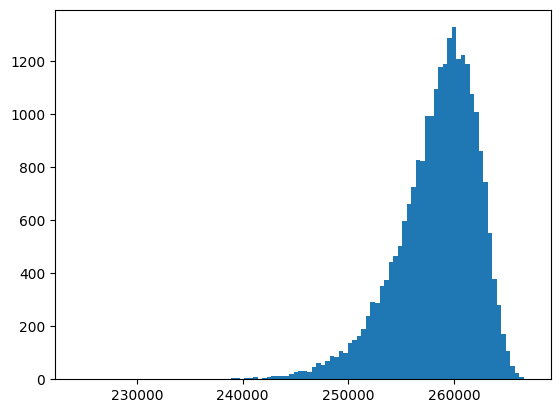

predicted coverage statistics:
    mean: 258289.4075805225
    std: 3740.564150523
    median: 258953.51777239144
    min: 223008.45133918524
    max: 265476.84449005127


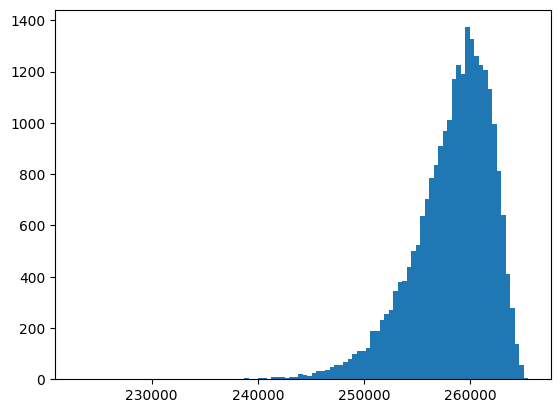

coverage difference (predicted - true) statistics:
    mean: -53.4843651239264
    std: 473.8833978977335
    median: -72.3036383241415
    min: -2199.1964553296566
    max: 2787.4182045161724


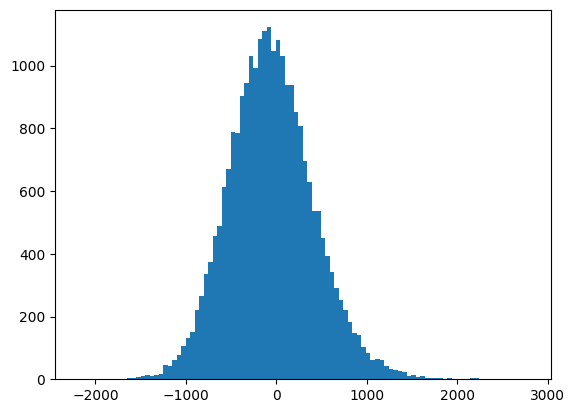

coverage difference above 50 statistics:
    mean: 406.1214872398457
    std: 303.7050948552315
    median: 327.8143619298935
    min: 50.00064069032669
    max: 2787.4182045161724


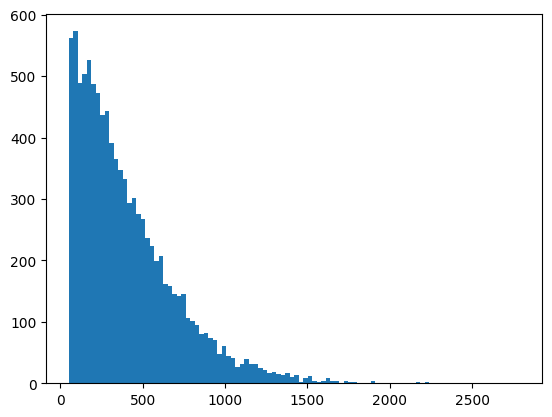

In [6]:
# Train MLP using MSE on overall coverage
weights = torch.tensor(demand, dtype=torch.float32, device=device)
loss_fn = lambda logits, targets: MLP.regression_loss(logits, targets, weights, sum_outputs=True, modified_sigmoid=True)

mlp = MLP(n_stations, [200], n_demand_nodes, dropout=0.1).to(device)
init_train_loss = mlp.evaluate_loss(X_train, y_train, loss_fn)
init_dev_loss = mlp.evaluate_loss(X_dev, y_dev, loss_fn)
print(f"Initial train loss: {init_train_loss}, initial dev loss: {init_dev_loss}")
mlp.fit(X_train, y_train, X_dev, y_dev, loss_fn, verbose=True)
print_output(mlp)

Evaluating: 100%|██████████| 196/196 [00:00<00:00, 662.17it/s]


Initial train loss: 5676502.24592, initial dev loss: 5680625.01072


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 628.21it/s]


Train loss: 136560.0140475, dev loss: 17746.503170625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 590.28it/s]


Train loss: 25772.79245875, dev loss: 8695.70662


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 634.30it/s]


Train loss: 17356.57125375, dev loss: 5825.61897171875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 634.30it/s]


Train loss: 13630.969161875, dev loss: 4659.89205421875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 626.20it/s]


Train loss: 11645.5453928125, dev loss: 4532.231864375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 10473.0944178125, dev loss: 3666.076691328125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 632.26it/s]


Train loss: 9750.7725959375, dev loss: 3625.167038125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 616.35it/s]


Train loss: 9284.3301796875, dev loss: 3325.80918890625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 622.22it/s]


Train loss: 8851.3091025, dev loss: 3325.37905015625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 616.19it/s]


Train loss: 8629.4556384375, dev loss: 2986.112178671875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 618.30it/s]


Train loss: 8295.32513625, dev loss: 2982.010585625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 613.64it/s]


Train loss: 8003.15713640625, dev loss: 2766.3648090625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 618.30it/s]


Train loss: 7820.03273546875, dev loss: 3155.086524453125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 7497.85404046875, dev loss: 2564.03155109375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 632.26it/s]


Train loss: 7264.258845, dev loss: 2522.90894109375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 628.21it/s]


Train loss: 6953.69644359375, dev loss: 2495.46447609375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 618.47it/s]


Train loss: 6751.27731390625, dev loss: 2342.705980703125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 626.19it/s]


Train loss: 6494.81205296875, dev loss: 2294.178482265625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 624.21it/s]


Train loss: 6322.91540796875, dev loss: 2229.376699765625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 632.26it/s]


Train loss: 6044.60271875, dev loss: 2103.23303546875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 604.94it/s]


Train loss: 5879.15580640625, dev loss: 2001.617868671875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 574.78it/s]


Train loss: 5721.14982765625, dev loss: 2043.67093765625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 616.36it/s]


Train loss: 5518.43256140625, dev loss: 2211.747235390625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 606.76it/s]


Train loss: 5304.1142853125, dev loss: 1889.681878828125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 573.10it/s]


Train loss: 5143.08640640625, dev loss: 1816.194865625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.07it/s]


Train loss: 4975.90486828125, dev loss: 1787.078084765625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 608.70it/s]


Train loss: 4835.48050734375, dev loss: 1776.7878441796875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.23it/s]


Train loss: 4717.8436315625, dev loss: 1767.8278671875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 610.59it/s]


Train loss: 4551.8117784375, dev loss: 1885.4946409375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 606.72it/s]


Train loss: 4428.17813734375, dev loss: 1604.477505


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 602.85it/s]


Train loss: 4310.93037953125, dev loss: 1849.551776796875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 588.58it/s]


Train loss: 4199.32112484375, dev loss: 1669.1065501171875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 597.56it/s]


Train loss: 4107.23147796875, dev loss: 1627.2431028125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 622.22it/s]


Train loss: 3977.50745140625, dev loss: 1523.4199730859375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 611.62it/s]


Train loss: 3830.5720134375, dev loss: 1433.820041015625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 612.51it/s]


Train loss: 3771.705537265625, dev loss: 1489.5324516015626


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.23it/s]


Train loss: 3703.733911640625, dev loss: 1791.77083453125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.39it/s]


Train loss: 3579.115121640625, dev loss: 1729.1883730859374


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 561.61it/s]


Train loss: 3517.095330234375, dev loss: 1366.6032846875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 590.36it/s]


Train loss: 3434.2460978125, dev loss: 1331.664672421875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 604.93it/s]


Train loss: 3338.284669765625, dev loss: 1412.498996640625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 608.70it/s]


Train loss: 3297.26130375, dev loss: 1328.5813716796874


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 606.81it/s]


Train loss: 3191.665686640625, dev loss: 1256.2473804296876


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.23it/s]


Train loss: 3142.942978359375, dev loss: 1277.918493671875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 3082.5483909375, dev loss: 1298.3170990625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 606.81it/s]


Train loss: 3025.487411328125, dev loss: 1460.309797109375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 592.15it/s]


Train loss: 2983.890149609375, dev loss: 1237.190536484375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 2893.2439709375, dev loss: 1283.0677247265626


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 616.34it/s]


Train loss: 2858.77208671875, dev loss: 1210.40124953125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 593.86it/s]


Train loss: 2787.571635546875, dev loss: 1196.809588671875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 608.58it/s]


Train loss: 2773.566241484375, dev loss: 1277.3251734765624


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 604.94it/s]


Train loss: 2713.682108359375, dev loss: 1162.298581484375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 610.59it/s]


Train loss: 2695.933239921875, dev loss: 1314.5004783984375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 624.20it/s]


Train loss: 2646.216178046875, dev loss: 1137.6013376953124


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 595.74it/s]


Train loss: 2614.495916796875, dev loss: 1214.6202453515625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 612.50it/s]


Train loss: 2573.168992734375, dev loss: 1157.868542734375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 582.15it/s]


Train loss: 2535.125509453125, dev loss: 1168.7852794140624


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 573.10it/s]


Train loss: 2533.5925340625, dev loss: 1315.805025390625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 597.56it/s]


Train loss: 2508.381228984375, dev loss: 1132.2933344921876


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 581.60it/s]


Train loss: 2484.62261921875, dev loss: 1118.3887827734375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 2467.1352134375, dev loss: 1139.054685859375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 622.22it/s]


Train loss: 2439.74592265625, dev loss: 1209.5744552734375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 593.94it/s]


Train loss: 2435.744267578125, dev loss: 1118.47582703125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 595.63it/s]


Train loss: 2431.007666953125, dev loss: 1109.2524962109376


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.62it/s]


Train loss: 2423.94800046875, dev loss: 1130.803124765625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 604.94it/s]


Train loss: 2409.707861953125, dev loss: 1176.4444092578126


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 624.21it/s]


Train loss: 2413.85389796875, dev loss: 1154.3166196875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 608.69it/s]


Train loss: 2403.721416015625, dev loss: 1112.8682998046875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 604.94it/s]


Train loss: 2381.022670234375, dev loss: 1118.608283984375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 595.74it/s]


Train loss: 2376.45901640625, dev loss: 1080.83565609375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 606.81it/s]


Train loss: 2377.68329734375, dev loss: 1093.052286328125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 614.33it/s]


Train loss: 2368.699346328125, dev loss: 1104.4344704492187


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 620.26it/s]


Train loss: 2366.254631015625, dev loss: 1121.5927759375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 621.72it/s]


Train loss: 2355.590195625, dev loss: 1182.10530796875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 606.31it/s]


Train loss: 2354.459689609375, dev loss: 1084.87036265625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 618.30it/s]


Train loss: 2349.8353040625, dev loss: 1076.154488671875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 590.36it/s]


Train loss: 2371.827278203125, dev loss: 1064.51094734375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 622.22it/s]


Train loss: 2347.520971875, dev loss: 1090.9769726953125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 604.93it/s]


Train loss: 2337.663034140625, dev loss: 1066.7574247265625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 604.50it/s]


Train loss: 2345.128725, dev loss: 1123.693421328125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.23it/s]


Train loss: 2344.66296296875, dev loss: 1070.270558984375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 614.43it/s]


Train loss: 2344.471044296875, dev loss: 1071.2565761132812


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 622.23it/s]


Train loss: 2352.94610578125, dev loss: 1086.8892270703125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 610.60it/s]


Train loss: 2343.4221025, dev loss: 1203.039882265625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 612.50it/s]


Train loss: 2346.13711515625, dev loss: 1092.512611875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 610.59it/s]


Train loss: 2351.84678515625, dev loss: 1062.8125073632812


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 583.34it/s]


Train loss: 2340.312068359375, dev loss: 1096.4583913671875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 608.69it/s]


Train loss: 2334.149331796875, dev loss: 1049.468875390625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 616.36it/s]


Train loss: 2323.39926625, dev loss: 1118.51683546875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.23it/s]


Train loss: 2318.4600121875, dev loss: 1046.4800862304687


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 610.59it/s]


Train loss: 2313.354951171875, dev loss: 1106.9004275390625


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.23it/s]


Train loss: 2318.57519296875, dev loss: 1175.9581198046876


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 606.81it/s]


Train loss: 2314.57984609375, dev loss: 1066.064916171875


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.39it/s]


Train loss: 2305.7610034375, dev loss: 1109.1975071484376


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 616.35it/s]


Train loss: 2303.263471015625, dev loss: 1110.716927578125


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 608.69it/s]


Train loss: 2325.134190390625, dev loss: 1167.60338359375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 612.50it/s]


Train loss: 2296.42562859375, dev loss: 1061.8642326367187


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 616.35it/s]


Train loss: 2312.54833, dev loss: 1082.162285234375


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 610.59it/s]


Train loss: 2294.51012421875, dev loss: 1063.0456712304688


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 590.36it/s]


Train loss: 2308.185282265625, dev loss: 1048.829651171875
Early stopping


Predicting: 100%|██████████| 196/196 [00:00<00:00, 1734.53it/s]


true coverage statistics:
    mean: 258342.89194564644
    std: 3855.1797776168737
    median: 258977.41951671243
    min: 224379.13118171692
    max: 267008.6257327199


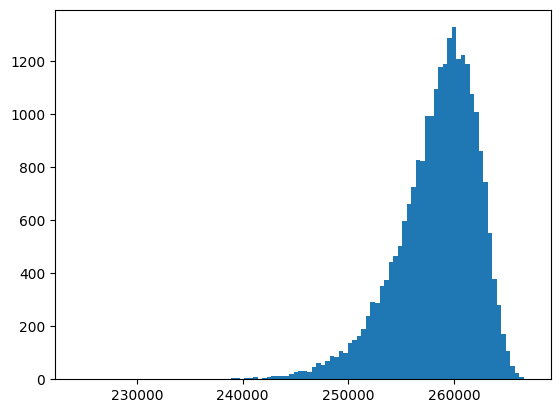

predicted coverage statistics:
    mean: 258275.57043027217
    std: 3521.0228782990716
    median: 258939.35104000568
    min: 229110.7759231925
    max: 265227.9885701537


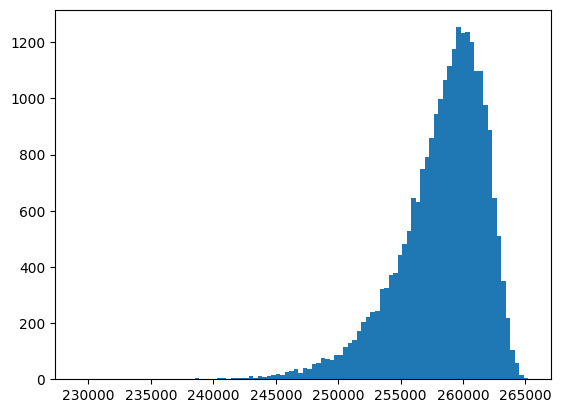

coverage difference (predicted - true) statistics:
    mean: -67.32151537423015
    std: 708.036398334831
    median: -100.46088396012783
    min: -2510.2495688796043
    max: 4731.644741475582


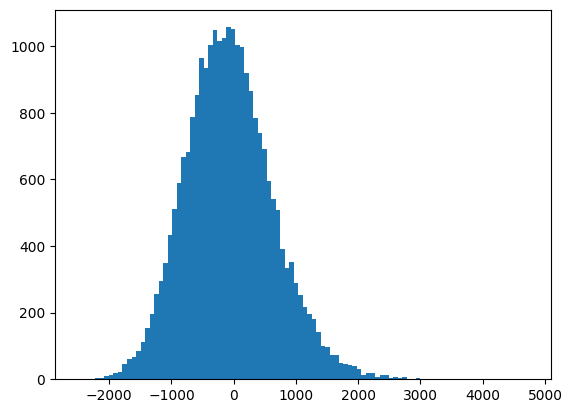

coverage difference above 50 statistics:
    mean: 598.2101513451089
    std: 468.83992860046544
    median: 477.8069136440754
    min: 50.00048905611038
    max: 4731.644741475582


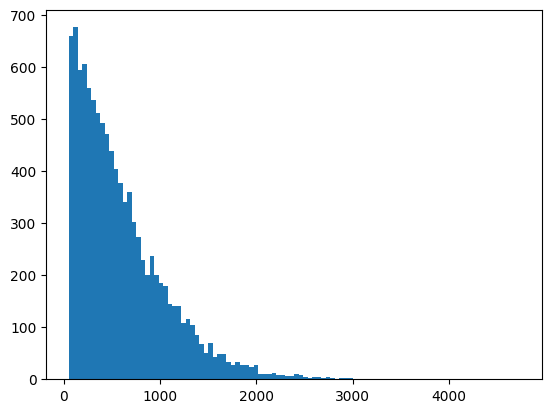

In [7]:
# Train MLP using MSE applied to each demand node's coverage
weights = torch.tensor(demand, dtype=torch.float32, device=device)
loss_fn = lambda logits, targets: MLP.regression_loss(logits, targets, weights, sum_outputs=False, modified_sigmoid=False)

mlp = MLP(n_stations, [200], n_demand_nodes, dropout=0.1).to(device)
init_train_loss = mlp.evaluate_loss(X_train, y_train, loss_fn)
init_dev_loss = mlp.evaluate_loss(X_dev, y_dev, loss_fn)
print(f"Initial train loss: {init_train_loss}, initial dev loss: {init_dev_loss}")
mlp.fit(X_train, y_train, X_dev, y_dev, loss_fn, verbose=True)
print_output(mlp)

Evaluating: 100%|██████████| 196/196 [00:00<00:00, 628.21it/s]


Initial train loss: 11930676448.13312, initial dev loss: 11934465115.42272


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 592.15it/s]


Train loss: 440624767.34208, dev loss: 95868186.368


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 585.08it/s]


Train loss: 84304125.984, dev loss: 41631135.6


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 604.87it/s]


Train loss: 45408761.3248, dev loss: 27535661.2352


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 593.94it/s]


Train loss: 36679660.14976, dev loss: 20585848.0288


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 586.83it/s]


Train loss: 28207279.4784, dev loss: 16381774.99904


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 597.57it/s]


Train loss: 25613691.56416, dev loss: 16852227.29088


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 597.56it/s]


Train loss: 22759679.57184, dev loss: 19272304.22144


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 588.59it/s]


Train loss: 23374973.0944, dev loss: 21377630.8032


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 594.39it/s]


Train loss: 18035762.84832, dev loss: 12000536.59488


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.23it/s]


Train loss: 17392196.1616, dev loss: 9597019.67808


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 597.56it/s]


Train loss: 17730216.81344, dev loss: 10113993.77456


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 16928538.20416, dev loss: 10559794.598


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 574.78it/s]


Train loss: 16005788.09664, dev loss: 9995141.97904


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 604.94it/s]


Train loss: 16715295.17184, dev loss: 17675336.43264


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 597.56it/s]


Train loss: 15177526.1216, dev loss: 9020430.3592


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 593.94it/s]


Train loss: 14217214.31776, dev loss: 14298642.856


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 14245039.12544, dev loss: 7793704.6784


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 595.75it/s]


Train loss: 15948831.29408, dev loss: 18442389.79936


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.08it/s]


Train loss: 14042624.09952, dev loss: 10713086.26944


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 593.94it/s]


Train loss: 14442433.9696, dev loss: 11060808.62432


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 588.59it/s]


Train loss: 13907467.04416, dev loss: 9243189.07168


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 595.75it/s]


Train loss: 12094482.11488, dev loss: 10285061.51696


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 595.75it/s]


Train loss: 12159642.48288, dev loss: 8640013.14096


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 583.33it/s]


Train loss: 13961863.47584, dev loss: 7613618.55664


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 578.17it/s]


Train loss: 12539825.38016, dev loss: 11751980.10656


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 13026306.7072, dev loss: 7999545.1484


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.39it/s]


Train loss: 12790873.34624, dev loss: 9530802.33856


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.26it/s]


Train loss: 13131744.43008, dev loss: 9562796.41376


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 593.94it/s]


Train loss: 12644927.22912, dev loss: 7637058.82256


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 597.56it/s]


Train loss: 12431874.8944, dev loss: 8601040.38176


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 10861693.69584, dev loss: 7456001.19344


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 581.60it/s]


Train loss: 11990081.89728, dev loss: 11746283.55072


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.22it/s]


Train loss: 12991420.8432, dev loss: 8880619.0384


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 12121386.3648, dev loss: 8587724.37296


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 593.75it/s]


Train loss: 11465010.11776, dev loss: 6696664.30192


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 574.78it/s]


Train loss: 11859175.84512, dev loss: 10628515.20576


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 608.70it/s]


Train loss: 11203770.74288, dev loss: 7032996.45472


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 592.15it/s]


Train loss: 10817330.03232, dev loss: 8685052.86648


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 592.15it/s]


Train loss: 10724585.23904, dev loss: 12079497.33472


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 11934814.05616, dev loss: 6707428.87424


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.22it/s]


Train loss: 12044947.52704, dev loss: 10818421.00256


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 597.42it/s]


Train loss: 10853475.93952, dev loss: 6728980.3016


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 597.45it/s]


Train loss: 11998328.45056, dev loss: 6506158.48896


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 574.78it/s]


Train loss: 11513158.17856, dev loss: 8161488.05296


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 590.36it/s]


Train loss: 10312392.88416, dev loss: 6138019.17808


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 10554543.30464, dev loss: 8570437.15088


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 601.04it/s]


Train loss: 11373469.2088, dev loss: 6410097.76368


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 616.35it/s]


Train loss: 10989276.39424, dev loss: 8704999.49664


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.31it/s]


Train loss: 9685302.16064, dev loss: 6751525.41936


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 588.59it/s]


Train loss: 10553642.32752, dev loss: 7380493.89072


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 603.08it/s]


Train loss: 11467536.0528, dev loss: 8137890.42272


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 597.56it/s]


Train loss: 11007841.33104, dev loss: 7007910.47536


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 597.56it/s]


Train loss: 12909270.70656, dev loss: 10720364.57376


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 599.38it/s]


Train loss: 9991866.5128, dev loss: 7497201.9912


Evaluating: 100%|██████████| 196/196 [00:00<00:00, 593.94it/s]


Train loss: 10483986.64544, dev loss: 12693784.71232
Early stopping


Predicting: 100%|██████████| 196/196 [00:00<00:00, 1750.02it/s]


true coverage statistics:
    mean: 258342.89194564644
    std: 3855.1797776168737
    median: 258977.41951671243
    min: 224379.13118171692
    max: 267008.6257327199


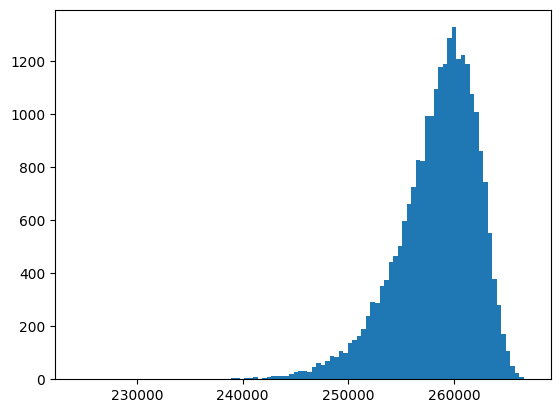

predicted coverage statistics:
    mean: 256031.35844959423
    std: 3905.9974713810207
    median: 256893.20497319102
    min: 211219.79250633717
    max: 262047.3990790844


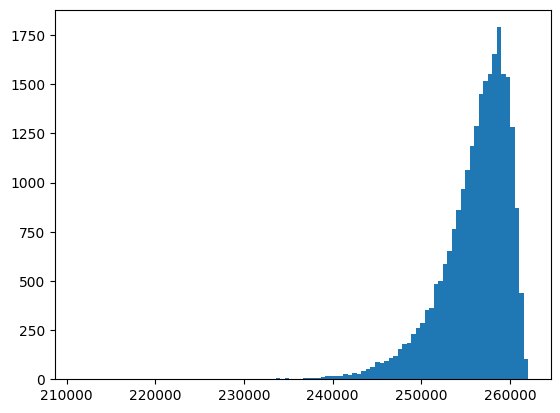

coverage difference (predicted - true) statistics:
    mean: -2311.5334960521664
    std: 828.9458971500536
    median: -2287.429461300373
    min: -13159.338675379753
    max: 1006.4240233302116


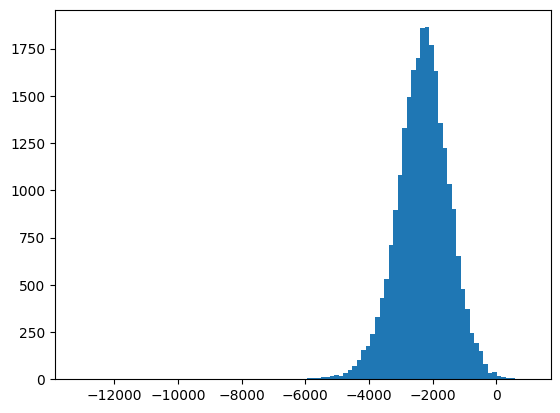

coverage difference above 50 statistics:
    mean: 303.2759413342509
    std: 214.3557576121696
    median: 269.22245490550995
    min: 54.589519917964935
    max: 1006.4240233302116


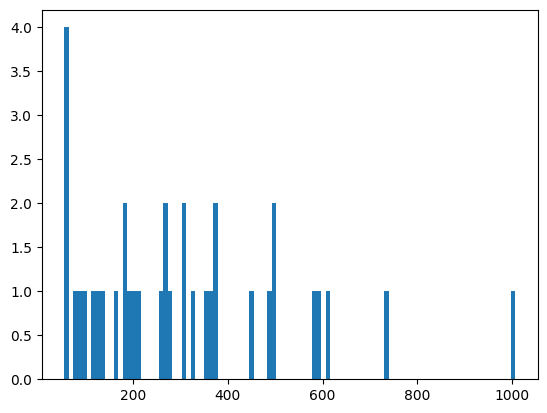

In [8]:
# Train MLP using MSE on overall coverage with additional penalty for overestimating coverage
weights = torch.tensor(demand, dtype=torch.float32, device=device)
loss_fn = lambda logits, targets: MLP.regression_loss(logits, targets, weights, sum_outputs=True, modified_sigmoid=True, weight_overestimate=1000.0)

mlp = MLP(n_stations, [200], n_demand_nodes, dropout=0.1).to(device)
init_train_loss = mlp.evaluate_loss(X_train, y_train, loss_fn)
init_dev_loss = mlp.evaluate_loss(X_dev, y_dev, loss_fn)
print(f"Initial train loss: {init_train_loss}, initial dev loss: {init_dev_loss}")
mlp.fit(X_train, y_train, X_dev, y_dev, loss_fn, verbose=True)
print_output(mlp)